# Dependencies

In [3]:
import numpy as np
import pandas as pd
import os
from concurrent.futures import ThreadPoolExecutor

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from scipy.interpolate import PchipInterpolator

from tqdm import tqdm

# Working on...

In [4]:
# Specify the directory path
dir_path = "../files/data/"

# Get folder names
master_folders = [f for f in os.listdir(dir_path) if os.path.isdir(os.path.join(dir_path, f))]

print(master_folders)

# Specify the directory path
dir_path = "../files/data/{}".format(master_folders[1])

# Get folder names
folders = [f for f in os.listdir(dir_path) if os.path.isdir(os.path.join(dir_path, f))]

print(folders)

['BH_SINGLE', 'FA700021D0002-23F0143']
['Small_Cracks_CS_bt0d25', 'Small_Cracks_CS_bt0d75', 'Small_Cracks_CS_bt0d5', 'Small_Cracks_Straight_Shank']


# .DAT to .csv

In [4]:
def process_file(file_info):
    input_file_path, output_file_path = file_info
    
    rows = []
    with open(input_file_path, 'r') as file:
        lines = file.readlines()

        W_R = None
        a_c, a_t, r_t, b_t = None, None, None, None
        crack = False

        for i, line in enumerate(lines):
            values = line.strip().split()
            if not values:
                continue

            if values[0] == "Results":
                W_R = float(values[4][:-1])

            elif values[0] == "ndom":
                crack = False
                next_values = lines[i + 1].strip().split()
                a_c, a_t, r_t, b_t = map(float, next_values[1:5])

            elif values[0] == "crack":
                crack = True

            elif values[0].isdigit() and crack:
                row = [W_R, a_c, a_t, r_t, b_t] + list(map(float, values[6:10]))
                rows.append(row)

    df = pd.DataFrame(rows, columns=['W/R', 'a/c', 'a/t', 'r/t', 'b/t', 'phi', 'K-T', 'K-B', 'K-P'])
    df.to_csv(output_file_path, index=False)

master_folder = master_folders[1]
tasks = []

for folder in folders:
    dir_path = os.path.join("../files/data", master_folder, folder)
    files = [f for f in os.listdir(dir_path) if os.path.isfile(os.path.join(dir_path, f))]

    for file_name in files:
        input_file_path = os.path.join(dir_path, file_name)
        output_file_path = os.path.join(dir_path, f"{file_name[:-4]}.csv")
        tasks.append((input_file_path, output_file_path))

# Process files in parallel
with ThreadPoolExecutor() as executor:
    list(tqdm(executor.map(process_file, tasks), total=len(tasks), desc="Processing Files"))
    # executor.map(process_file, tasks)


Processing Files: 100%|██████████| 187/187 [13:09<00:00,  4.22s/it]


# One .csv for each b/t

In [ ]:
master_folder = master_folders[1]

for folder in folders:
    # Specify the directory path
    dir_path = "../files/data/{}/{}".format(master_folder, folder)

    # Get all .csv files
    csv_files = [f for f in os.listdir(dir_path) if f.endswith(".csv")]

    print(csv_files)

    df = pd.read_csv("../files/data/{}/{}/{}".format(master_folder, folder, csv_files[0]))
    # df = df.drop(columns=["b/t"])
    df = df.drop(df[df['phi'] == 0].index)
    df = df.drop(df[df['K-T'] == 0].index)
    df = df.drop(df[df['K-B'] == 0].index)
    df = df.drop(df[df['K-P'] == 0].index)
    df.dropna(inplace=True)

    for index in csv_files[1:]:
        df_ = pd.read_csv("../files/data/{}/{}/{}".format(master_folder, folder, index))
        # df_ = df_.drop(columns=["b/t"])
        df_ = df_.drop(df_[df_['phi'] == 0].index)
        df_ = df_.drop(df_[df_['K-T'] == 0].index)
        df_ = df_.drop(df_[df_['K-B'] == 0].index)
        df_ = df_.drop(df_[df_['K-P'] == 0].index)
        df_.dropna(inplace=True)
        df = pd.concat([df, df_], axis=0, ignore_index=True)

    df.to_csv("../files/data/{}/{}.csv".format(master_folder, folder), index=False)

# Viz each .csv

In [7]:
master_folder = master_folders[1]

# Specify the directory path
dir_path = "../files/data/{}".format(master_folder)

# Get all .csv files
csv_files = [f for f in os.listdir(dir_path) if f.endswith(".csv")]

print(csv_files)

['Small_Cracks_CS_bt0d25.csv', 'Small_Cracks_CS_bt0d5.csv', 'Small_Cracks_Straight_Shank.csv', 'Small_Cracks_CS_bt0d75.csv']


Working On: Small_Cracks_CS_bt0d25.csv
Different combinations:  85361

Different W/r values:  [  1.6   1.8   2.    2.2   2.4   2.6   2.8   3.2   3.6   4.    4.6   5.2
   5.8   6.4   7.    8.    9.   10.   12.   16.   20.   30.   40.  100. ]
Different a/c values:  [ 0.1     0.125   0.1667  0.2     0.25    0.333   0.5     0.667   0.75
  0.8     0.9     1.      1.1111  1.25    1.333   1.5     2.      3.
  6.     10.    ]
Different a/t values:  [0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1 ]
Different r/t values:  [ 0.1     0.111   0.125   0.25    0.333   0.4     0.5714  0.667   0.75
  0.8     1.      1.25    1.333   1.5     2.      2.25    2.5     3.
  4.      5.      7.      9.     10.    ]
Different b/t values:  [0.25]


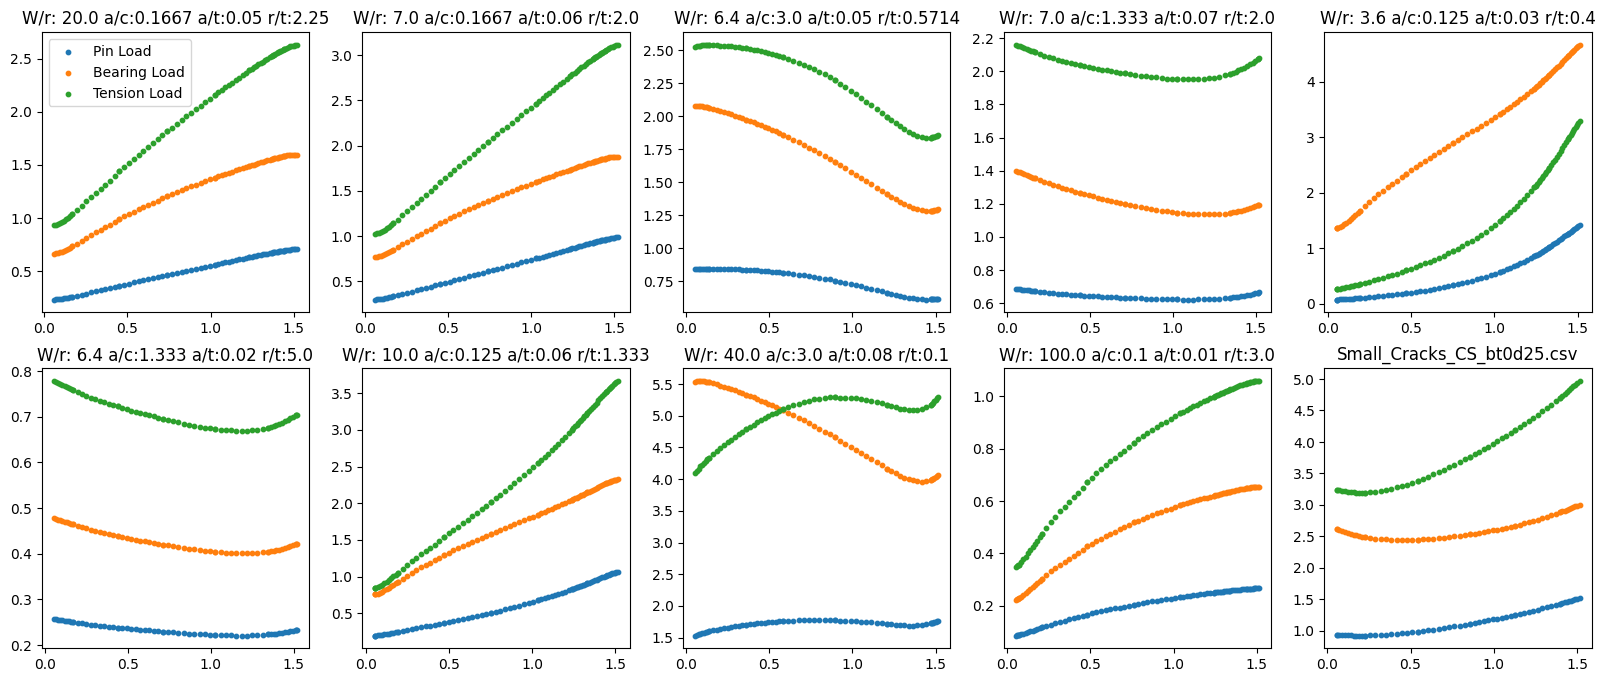

Working On: Small_Cracks_CS_bt0d5.csv
Different combinations:  118882

Different W/r values:  [  1.6   1.8   2.    2.2   2.4   2.6   2.8   3.2   3.6   4.    4.6   5.2
   5.8   6.4   7.    8.    9.   10.   12.   16.   20.   30.   40.  100. ]
Different a/c values:  [ 0.1     0.125   0.1667  0.2     0.25    0.333   0.5     0.667   0.75
  0.8     0.9     1.      1.1111  1.25    1.333   1.5     2.      3.
  6.     10.    ]
Different a/t values:  [0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1 ]
Different r/t values:  [ 0.1     0.125   0.1428  0.1667  0.2     0.25    0.4     0.4444  0.5
  0.5714  0.667   0.75    0.8     1.      1.25    1.333   1.5     1.75
  2.      2.25    2.5     3.      4.      5.      6.      7.      8.
  9.     10.    ]
Different b/t values:  [0.5]


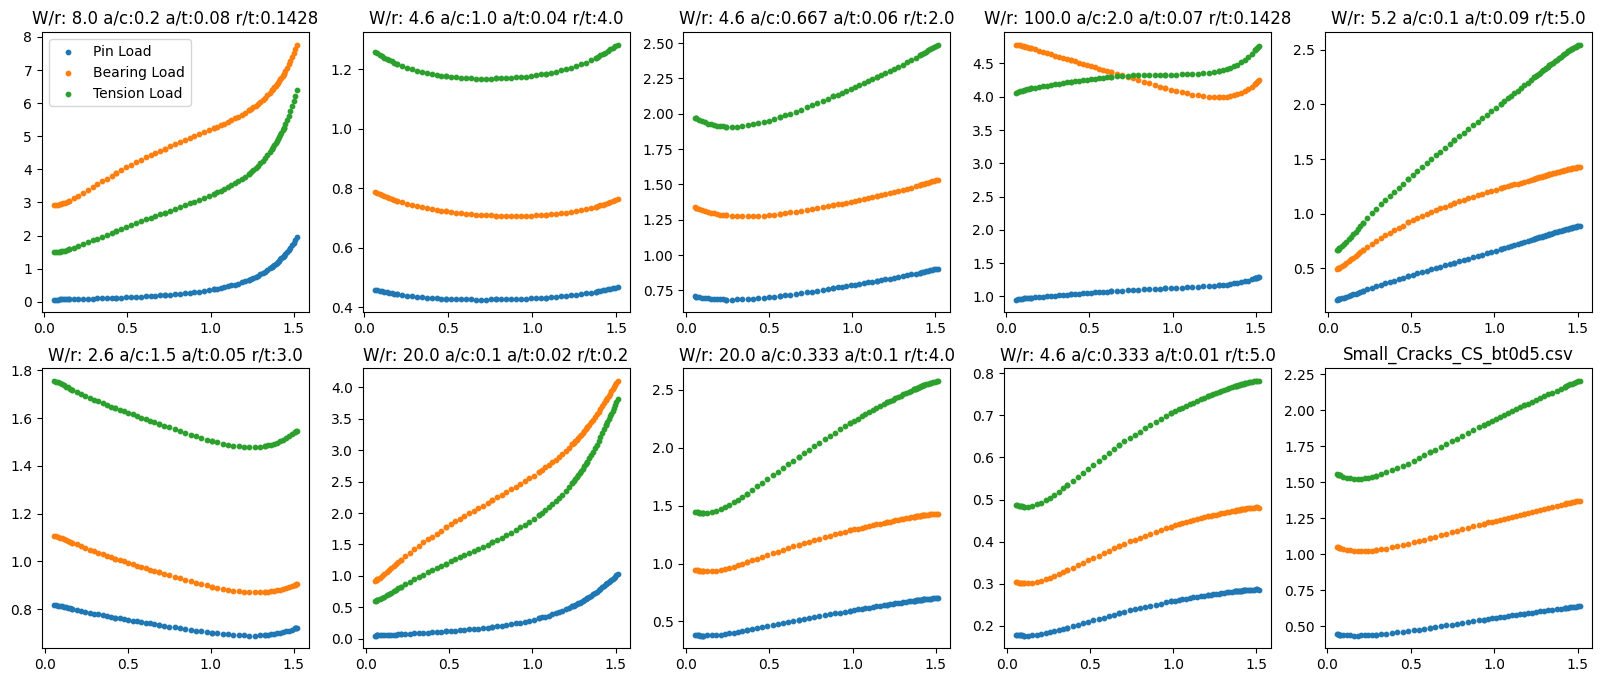

Working On: Small_Cracks_Straight_Shank.csv
Different combinations:  143467

Different W/r values:  [  1.6   1.8   2.    2.2   2.4   2.6   2.8   3.2   3.6   4.    4.6   5.2
   5.8   6.4   7.    8.    9.   10.   12.   16.   20.   30.   40.  100. ]
Different a/c values:  [ 0.1     0.125   0.1667  0.2     0.25    0.333   0.5     0.667   0.75
  0.8     0.9     1.      1.1111  1.25    1.333   1.5     2.      3.
  6.     10.    ]
Different a/t values:  [0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1 ]
Different r/t values:  [ 0.1     0.111   0.125   0.1428  0.1667  0.2     0.25    0.333   0.4
  0.4444  0.5     0.5714  0.667   0.75    0.8     1.      1.25    1.333
  1.5     1.75    2.      2.25    2.5     3.      4.      5.      6.
  7.      8.      9.     10.    ]
Different b/t values:  [0.05]


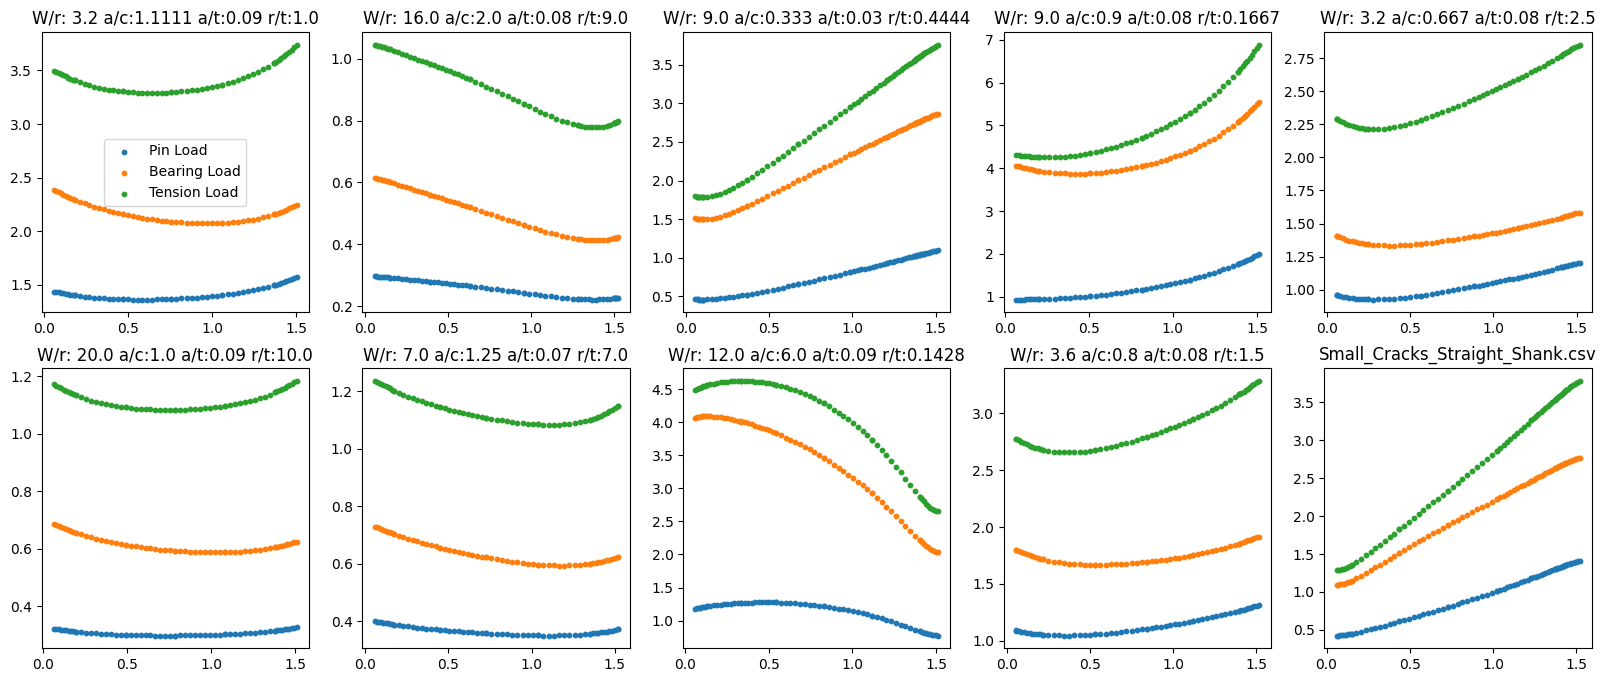

Working On: Small_Cracks_CS_bt0d75.csv
Different combinations:  114449

Different W/r values:  [  1.6   1.8   2.    2.2   2.4   2.6   2.8   3.2   3.6   4.    4.6   5.2
   5.8   6.4   7.    8.    9.   10.   12.   16.   20.   30.   40.  100. ]
Different a/c values:  [ 0.1     0.125   0.1667  0.2     0.25    0.333   0.5     0.667   0.75
  0.8     0.9     1.      1.1111  1.25    1.333   1.5     2.      3.
  6.     10.    ]
Different a/t values:  [0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1 ]
Different r/t values:  [0.1    0.111  0.125  0.1428 0.25   0.333  0.4    0.4444 0.5    0.5714
 0.667  0.75   0.8    1.     1.25   1.333  1.5    1.75   2.     2.25
 3.     4.     5.     6.     7.     8.     9.    ]
Different b/t values:  [0.75]


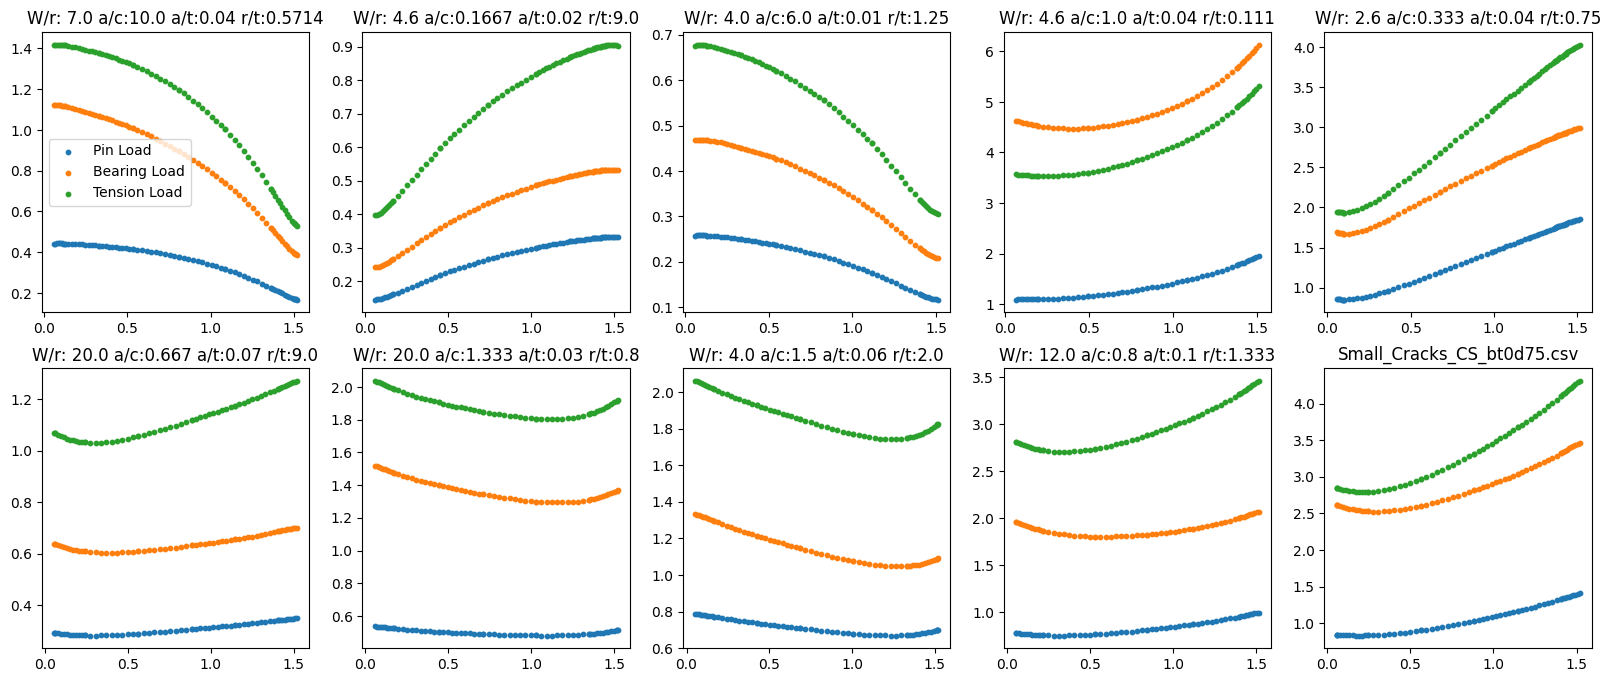

In [8]:
for file in csv_files:
    print("========================")
    print("Working On: {}".format(file))
    print("========================")
    df = pd.read_csv("../files/data/{}/{}".format(master_folder, file))
    d = df.to_numpy()

    # Getting all a/c, a/t and c/b combinations
    CC_combinations = [d[0,:5]]

    for line in d:
        if (line[:5] == CC_combinations[-1]).all():
            continue
        else:
            CC_combinations.append(line[:5])

    CC_combinations = np.unique(CC_combinations, axis=0)

    print("Different combinations: ", len(CC_combinations))
    
    print("")

    print("Different W/r values: ", np.unique(CC_combinations[:,0], axis=0))
    print("Different a/c values: ", np.unique(CC_combinations[:,1], axis=0))
    print("Different a/t values: ", np.unique(CC_combinations[:,2], axis=0))
    print("Different r/t values: ", np.unique(CC_combinations[:,3], axis=0))
    print("Different b/t values: ", np.unique(CC_combinations[:,4], axis=0))

    np.random.seed(0)
    fig, axs = plt.subplots(2, 5, figsize=(20,8))
    for i in range(2):
        for j in range(5):
            idx = np.random.randint(0, len(CC_combinations))
            combination = CC_combinations[idx]
            indices = np.where((d[:, 0] == combination[0]) & 
                            (d[:, 1] == combination[1]) &
                            (d[:, 2] == combination[2]) &
                            (d[:, 3] == combination[3]) &
                            (d[:, -4] >= np.max(np.unique(0.052))) & 
                            (d[:, -4] <= np.min(np.unique(1.52))))
            indices = indices[0]
            axs[i,j].scatter(d[indices][:,-4], d[indices][:,-1], label="Pin Load", s=10)
            axs[i,j].scatter(d[indices][:,-4], d[indices][:,-2], label="Bearing Load", s=10)
            axs[i,j].scatter(d[indices][:,-4], d[indices][:,-3], label="Tension Load", s=10)
            axs[i,j].set_title("W/r: {} a/c:{} a/t:{} r/t:{}".format(combination[0], combination[1], combination[2], combination[3]))
            
            if i == 0 and j == 0:
                axs[i,j].legend()
    plt.show()